In [1]:
# import hierarchical clustering libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
crimeData=pd.read_csv("C:\\Users\\Mani\\Desktop\\Excelr\\Assignments\\Clustering\\crime_data.csv")
crimeData.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [3]:
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crimeData.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
# There are no null values in the data set

In [6]:
crimeData[crimeData.duplicated()].shape

(0, 5)

In [7]:
#There are no duplicated values

In [8]:
crimeData=crimeData.rename({'Unnamed: 0':'City'},axis=1)

In [9]:
crimeData.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Data Visualization

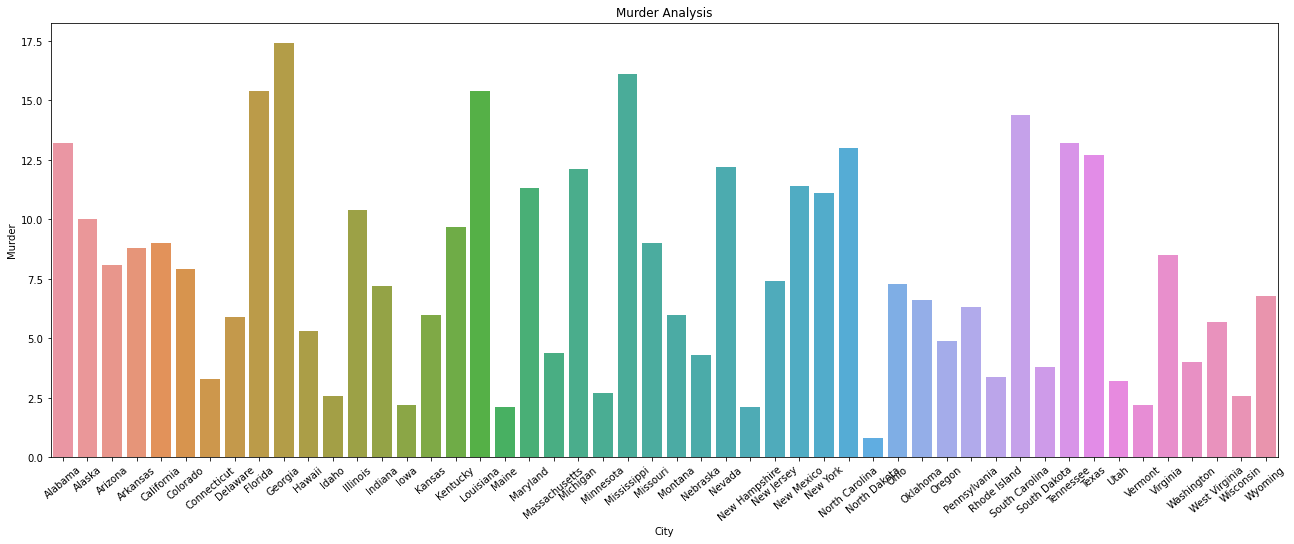

In [10]:
plt.figure(figsize=(22,8))
ax=sns.barplot(y=crimeData.Murder,x=crimeData.City)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.title("Murder Analysis")
plt.show()

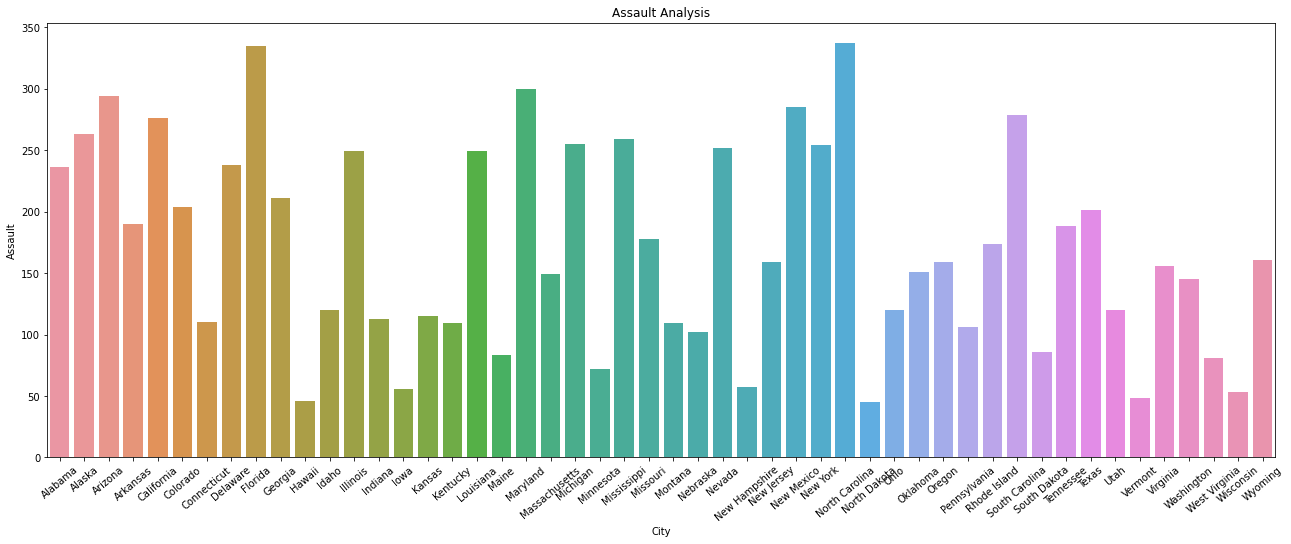

In [11]:
plt.figure(figsize=(22,8))
ax=sns.barplot(y=crimeData.Assault,x=crimeData.City)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.title("Assault Analysis")
plt.show()

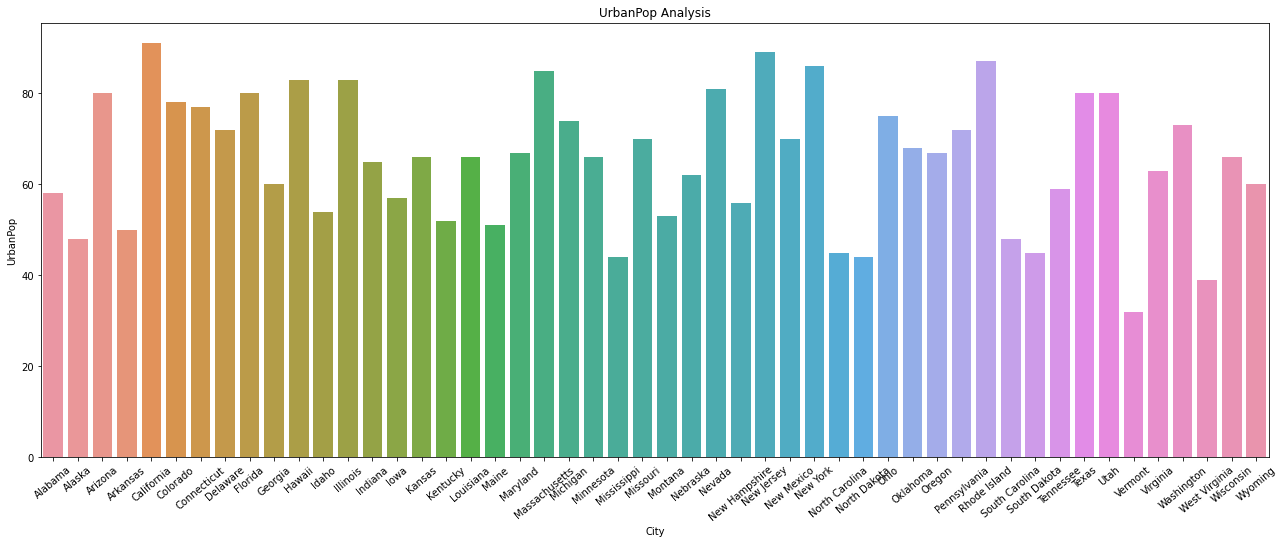

In [12]:
plt.figure(figsize=(22,8))
ax=sns.barplot(y=crimeData.UrbanPop,x=crimeData.City)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.title("UrbanPop Analysis")
plt.show()

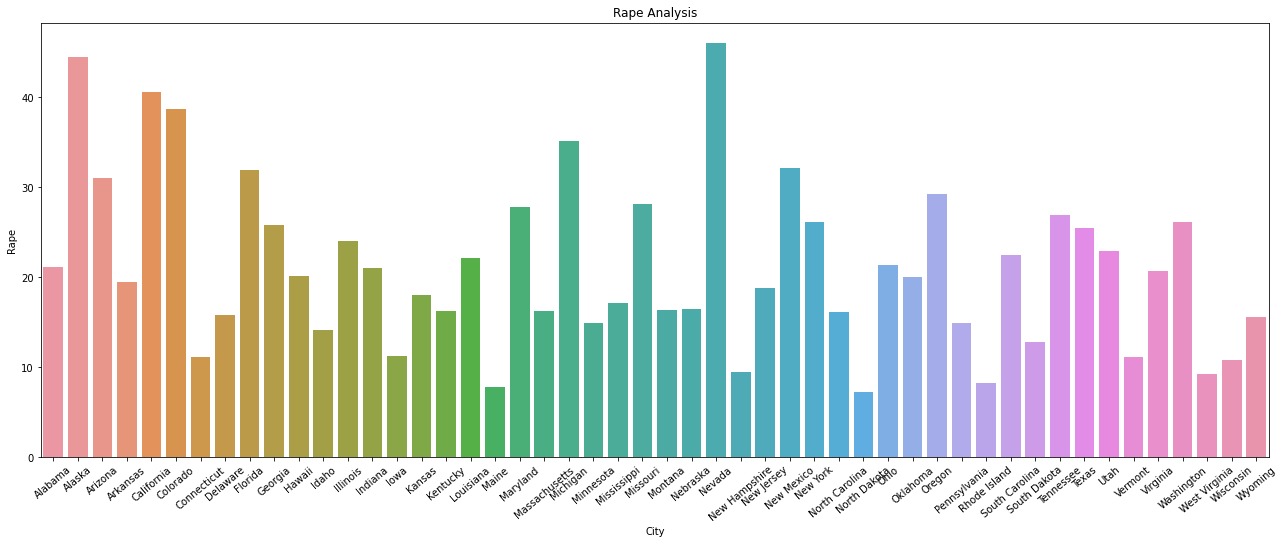

In [13]:
plt.figure(figsize=(22,8))
ax=sns.barplot(y=crimeData.Rape,x=crimeData.City)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.title("Rape Analysis")
plt.show()

In [14]:
# The plots have irregular patterns. 

# Hierarchial Clustering

In [15]:
# Normalization Method
def norm(i):
    x=((i-i.min())/(i.max()-i.min()))
    return(x)

In [16]:
cd_norm=norm(crimeData.iloc[:,1:])
cd_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


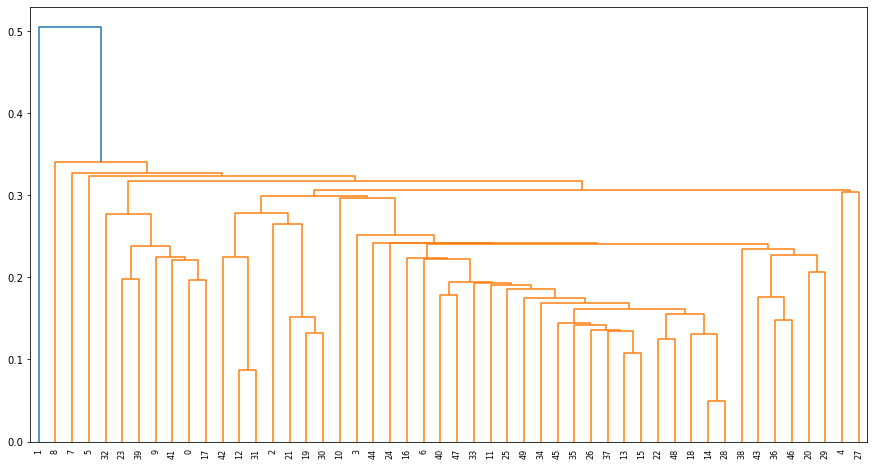

In [17]:
# Hierarchieal clustering using Single Linkage
plt.figure(figsize=(15,8))
single=sch.dendrogram(sch.linkage(cd_norm,method='single'))

In [18]:
# This is not a proper clustering as all the data points except one are grouped under one cluster

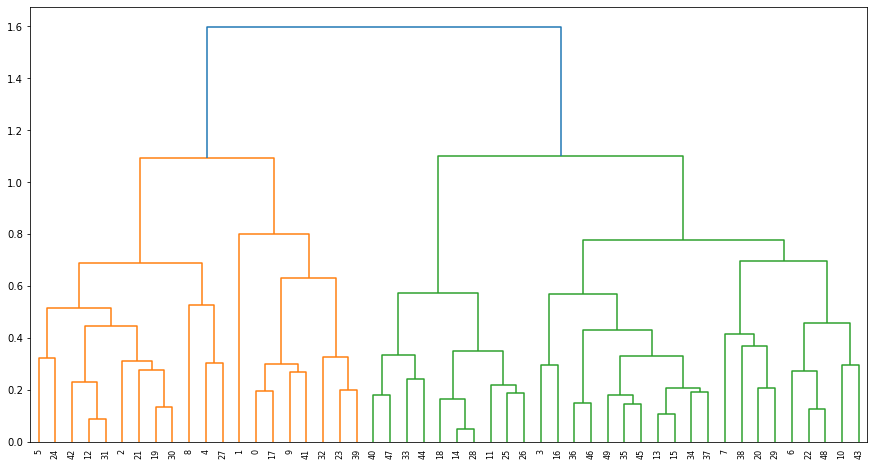

In [19]:
# Hierarchieal clustering using Complete Linkage
plt.figure(figsize=(15,8))
single=sch.dendrogram(sch.linkage(cd_norm,method='complete'))

In [20]:
# Complete linkage has two or four Clusters

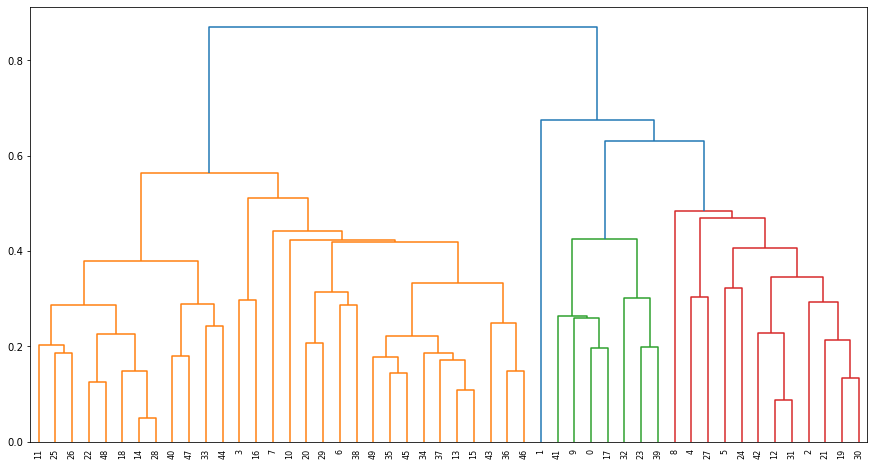

In [21]:
# Hierarchieal clustering using Average Linkage
plt.figure(figsize=(15,8))
single=sch.dendrogram(sch.linkage(cd_norm,method='average'))

In [22]:
# In average linkage we get 4 clusters

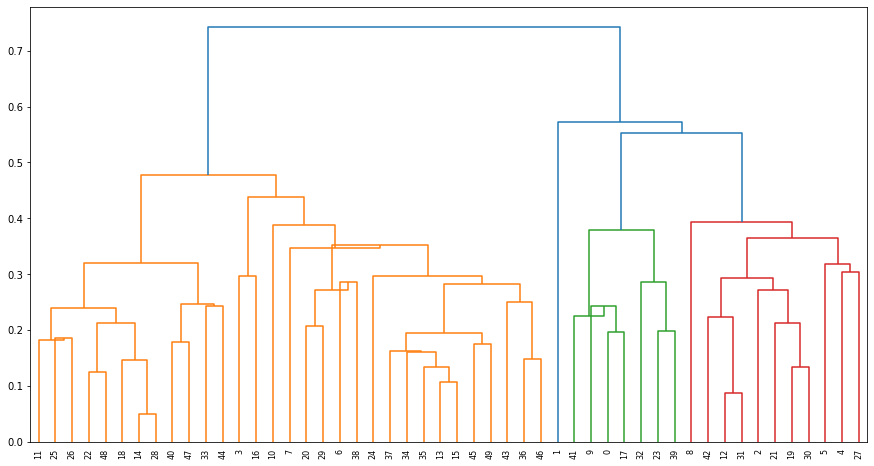

In [23]:
# Hierarchieal clustering using Centroid Linkage
plt.figure(figsize=(15,8))
single=sch.dendrogram(sch.linkage(cd_norm,method='centroid'))

In [24]:
# In centroid linkage we get 5 clusters

In [25]:
# Aglomerative clustering
hc1=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
cluster=hc1.fit_predict(cd_norm)
crimeData['ClusterID_Complete']=pd.Series(cluster)

In [26]:
crimeData.iloc[:,1:].groupby(crimeData.ClusterID_Complete).mean()

,Murder,Assault,UrbanPop,Rape,ClusterID_Complete
ClusterID_Complete,,,,,
0,14.087500,252.750000,53.500000,24.5375,0.0
1,5.715000,132.300000,70.800000,18.1000,1.0
2,3.180000,78.700000,49.300000,11.6300,2.0
3,10.883333,256.916667,78.333333,32.2500,3.0


In [27]:
hc2=AgglomerativeClustering(n_clusters=5 , affinity='euclidean', linkage='average')
cluster=hc2.fit_predict(cd_norm)
crimeData['ClusterID_average']=pd.Series(cluster)
crimeData=crimeData.drop(['ClusterID_Complete'],axis=1)

In [28]:
crimeData.iloc[:,1:].groupby(crimeData.ClusterID_average).mean()

,Murder,Assault,UrbanPop,Rape,ClusterID_average
ClusterID_average,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,3.091667,76.000000,52.083333,11.833333,4.0


# K-Means Clustering

In [29]:
cd=pd.read_csv("C:\\Users\\Mani\\Desktop\\Excelr\\Assignments\\Clustering\\crime_data.csv")
cd.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [30]:
# Normalizating to make the data scale free
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cd_norm_df=scaler.fit_transform(cd.iloc[:,1:])
cd_norm_df[0:5,:]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

C:\Users\Mani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


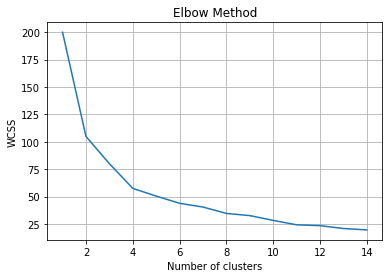

In [31]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(cd_norm_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [32]:
# elbow is observed at 4

Text(0.5, 1.0, 'Silhouette score plot')

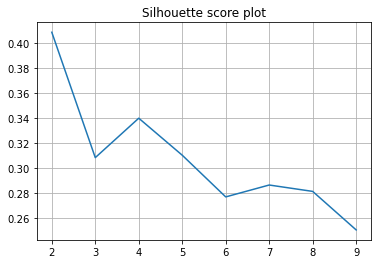

In [33]:
# Kmeans algorithm
from sklearn.cluster import KMeans
from sklearn import metrics
sc=[]
for i in range(2,10):
    kmeans_cluster=KMeans(n_clusters=i)
    kmeans_cluster.fit(cd_norm_df)
    sc.append(metrics.silhouette_score(cd_norm_df,kmeans_cluster.labels_))
    
plt.plot(range(2,10),sc)
plt.grid()
plt.title("Silhouette score plot")

In [34]:
# since the silhouette score for 2 has the highest , it is the better k value

#No of points in each cluster

In [35]:
kmeans_cluster=KMeans(n_clusters=2)
kmeans_cluster.fit(cd_norm_df)
pd.Series(kmeans_cluster.labels_).value_counts()

0    30
1    20
dtype: int64

In [36]:
cd['clusterID']=kmeans_cluster.labels_

In [37]:
cd.groupby('clusterID').mean()

,Murder,Assault,UrbanPop,Rape
clusterID,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


In [ ]:
# K mean clustering has 2 clusters

# DBSCAN 

In [38]:
cd_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\Excelr\\Assignments\\Clustering\\crime_data.csv")
cd_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [39]:
# DBSCAN algorithm
from sklearn.cluster import DBSCAN
db_scan=DBSCAN(eps=1.25 ,min_samples=5)  # min_samples >= no of dimensions + 1
db_scan.fit(cd_norm_df)

DBSCAN(eps=1.25)

In [40]:
pd.Series(db_scan.labels_).value_counts()

 2    32
 1     7
-1     6
 0     5
dtype: int64

In [41]:
cd_df['clusterID']=db_scan.labels_

In [42]:
#Outliers found in DBSCAN algorithm
cd_df[cd_df.clusterID==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterID
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
8,Florida,15.4,335,80,31.9,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1
32,North Carolina,13.0,337,45,16.1,-1


In [43]:
# silhouette score
from sklearn import metrics
print("silhouette score : ",metrics.silhouette_score(cd_norm_df,db_scan.labels_))

silhouette score :  0.23869670053300915


In [ ]:
# 3 clusters are in DBSCAN